In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
!pwd

/notebooks


In [3]:
doc(GrandparentSplitter)

GrandparentSplitter(train_name='train', valid_name='valid')
Split `items` from the grand parent folder names (`train_name` and `valid_name`).

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [5]:
import os
data_path = os.path.join('/storage/rock-paper-scissors', 'rockpaperscissors')

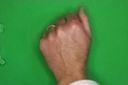

In [6]:
paths = get_image_files(data_path)

im = Image.open(paths[0])
im.shape
im.to_thumb(128,128)

In [7]:
rps_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(size=128, min_scale=0.5),
    batch_tfms=aug_transforms())

In [95]:
doc(aug_transforms)

In [8]:
rps_dls = rps_db.dataloaders(data_path)

In [97]:
doc(show_batch)

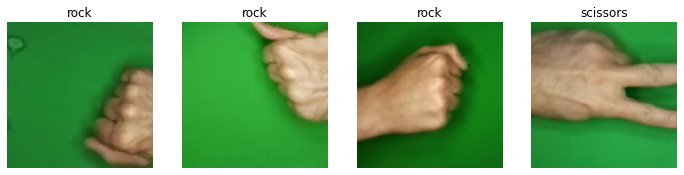

In [9]:
rps_dls.train.show_batch(max_n=4, unique=False, nrows=1)

In [10]:
learn = vision_learner(rps_dls, resnet34, metrics=error_rate)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.fine_tune(3)

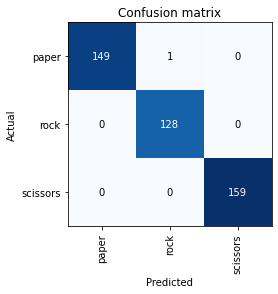

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

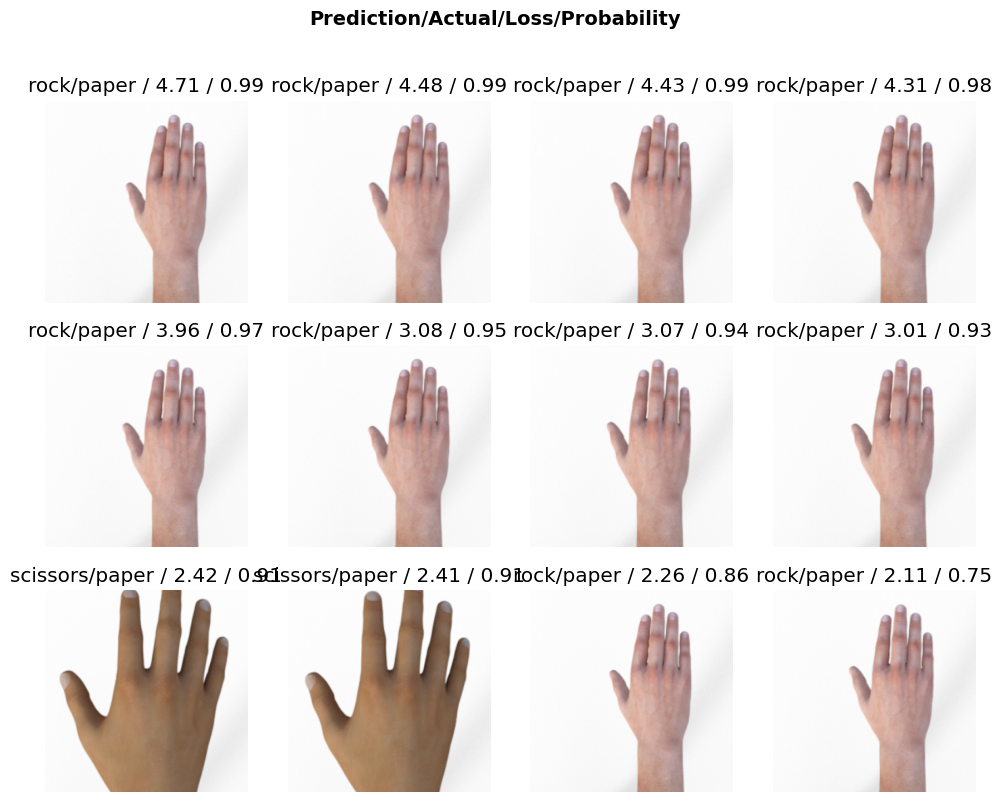

In [86]:
interp.plot_top_losses(12, nrows=3)

In [76]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [79]:
print(cleaner.change())

[]


In [80]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [102]:
learn.export()

In [108]:
root = os.path.abspath('')
root_path = Path(root)

In [3]:
learn_inf = load_learner('export.pkl')

In [7]:
pred, pred_idx, probs = learn_inf.predict('Rock-Paper-Scissors/validation/rock7.png')

In [8]:
print(float(probs[0]))

6.9817929215787444e-09


In [1]:
import gradio as gr
from fastai.vision.all import *
import skimage

learn = load_learner('export.pkl')
labels = learn.dls.vocab

class Hands(Enum):
     ROCK = 1
     PAPER = 2
     SCISSORS = 3

def predict(img):
    img = PILImage.create(img)
    pred, pred_idx, probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


def get_results(hand1: Hands, hand2: Hands):
    if hand1 == hand2:
        return "Draw"
    elif hand1 == Hands.ROCK and hand2 == Hands.SCISSORS:
        return "Rock wins"
    elif hand1 == Hands.PAPER and hand2 == Hands.ROCK:
        return "Paper wins"
    elif hand1 == Hands.SCISSORS and hand2 == Hands.PAPER:
        return "Scissors wins"
    else:
        raise ValueError("Invalid hands")


title = "Rock Paper Scissors AI"
description = "A simple rock paper scissors game with AI"
examples = ['Rock-Paper-Scissors/validation/rock7.png']
interpretation = 'default'
enable_queue = True

webcam = gr.inputs.Image(shape=(640, 480), source='webcam')

gr.Interface(fn=predict,
             inputs=webcam,
             outputs=gr.outputs.Label(num_top_classes=3), title=title,
             description=description, examples=examples,
             interpretation=interpretation, enable_queue=enable_queue).launch()


/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/Users/pandakas/miniconda3/envs/fast_ai_project_en

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/PIL/Image.py", line 3135, in open
    fp.seek(0)
AttributeError: 'NoneType' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/routes.py", line 337, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/blocks.py", line 1015, in process_api
    result = await self.call_function(
  File "/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/gradio/blocks.py", line 833, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/pandakas/miniconda3/envs/fast_ai_project_env/lib/python3.10/site-packages/anyio/to_thread.py", line 28, in run